In [1]:
from psychopy import visual, core, event #import some libraries from PsychoPy

#create a window - depend on computers in lab 
mywin = visual.Window([800,600],monitor="testMonitor", units="deg")

# stimuli generation
grating = visual.GratingStim(win=mywin, mask='circle', size=3, pos=[-4,0], sf=3)
fixation = visual.GratingStim(win=mywin, size=0.2, pos=[0,0], sf=0, rgb=-1)

#draw the stimuli and update the window
while True: #this creates a never-ending loop
    grating.setPhase(0.05, '+')#advance phase by 0.05 of a cycle
    grating.draw()
    fixation.draw()
    mywin.flip()

    if len(event.getKeys())>0:
        break
    event.clearEvents()

#cleanup
mywin.close()
core.quit()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
2.3691 	WARNING 	Monitor specification not found. Creating a temporary one...
5.1091 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead


SystemExit: 0

f:\software\2python\envs\psypy3\lib\site-packages\IPython\core\interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


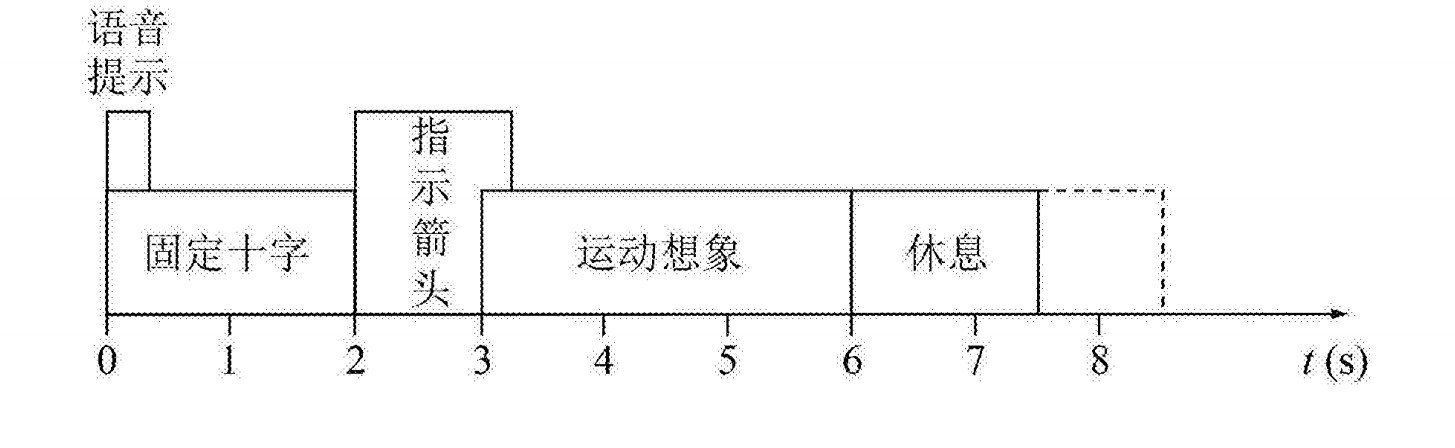

In [3]:
from IPython.display import Image
Image("paradigm1.jpg")

# JinBiao's Exp paradigm building

The following variables including inputs and outputs should be considered:
- the time annotation since the python window is not able to communicate with python (maybe by LCL, we can have access the data in real time, but in the begining stage, we put this idea aside). The time annotation will help us segment the signal later when processing it
- a verbal instruction should be given out - or a computer-synthesized sound should be recorded at the begining of the paradigm

In [1]:
# Utils py file
# Run before start the Exp
# Author: Gansheng TAN ,19 sept 2019
def showRightArrow():
    upperLine = visual.Line(win=mywin,start=(0, 1), end=(1, 0))
    lowerLine = visual.Line(win=mywin,start=(0, -1), end=(1, 0))
    horizontalLine = visual.Line(win=mywin,start=(-2, 0), end=(1, 0))
    upperLine.draw()
    lowerLine.draw()
    horizontalLine.draw()
    mywin.flip()
    return True

def showLeftArrow():
    upperLine = visual.Line(win=mywin,start=(0, 1), end=(-1, 0))
    lowerLine = visual.Line(win=mywin,start=(0, -1), end=(-1, 0))
    horizontalLine = visual.Line(win=mywin,start=(2, 0), end=(-1, 0))
    upperLine.draw()
    lowerLine.draw()
    horizontalLine.draw()
    mywin.flip()

In [10]:
# ctrl+enter to start the Exp
from psychopy import visual, core, event
from psychopy import sound
import numpy as np
import pandas as pd

# consulting the following examples anad Enter path and max_times manually
max_times = 100
labels_fn = r'F:\software\1NE_NIC2\raw\motor_imagine_data\labels\100times_test_section2.csv'

# variables setting
labels_df_ini = {'index':[0],'label':['leftOrRight']}
labels_df = pd.DataFrame(labels_df_ini)

beginTone = sound.backend_sounddevice.SoundDeviceSound(secs=1)
# flip(clearBuffer=True)[source]
# Flip the front and back buffers after drawing everything for your frame.
# (This replaces the update() method, better reflecting what is happening underneath).

# create window and begin welcoming words
mywin = visual.Window([1500,800],monitor="testMonitor", units="deg")
welcomingMessage = visual.TextStim(mywin, pos=(8, 0.0),
                                   text='Please listen to the guide from instrutor, and press keyboard=s to start the experiment')

#counter = 0


while True: #this creates a never-ending loop
    welcomingMessage.autoDraw = True  # Automatically draw every frame
    mywin.flip()
    if event.getKeys()==['s']:
        break
    event.clearEvents()
    
for i in range(max_times):
    # turn black and begin the experiment
    welcomingMessage.autoDraw = False
    mywin.flip()
    clock = core.Clock()
    while clock.getTime() < 1.0:  # Clock times are in seconds
        mywin.flip()
        if event.getKeys()==['e']:
            mywin.close()
            core.quit()
            break
        event.clearEvents()

    beginTone = sound.backend_sounddevice.SoundDeviceSound(secs=1)
    beginTone.play()
    while clock.getTime()<3.0:   
        cross = visual.GratingStim(win=mywin, size=2, pos=[0,0], sf=0, rgb=-1,mask='cross')
        cross.draw()
        mywin.flip()
        if event.getKeys()==['e']:
            mywin.close()
            core.quit()
            break
        event.clearEvents()


    direction = np.random.choice(a=['left','right'],p =[0.5,0.5])
    labels_df = labels_df.append({'index':i,'label':direction},ignore_index=True)
    while clock.getTime() < 7.0:
        if direction =='left':
            showLeftArrow()
            
        elif direction == 'right':
            showRightArrow()
        else:
            print('undefined direction')

        if event.getKeys()==['e']:
            mywin.close()
            core.quit()
            break
        event.clearEvents()
        
    while clock.getTime() <8.0:
        if event.getKeys()==['e']:
            mywin.close()
            core.quit()
            break
        mywin.flip()


#cleanup
mywin.close()
core.quit()




2431.3804 	WARNING 	Couldn't measure a consistent frame rate.
  - Is your graphics card set to sync to vertical blank?
  - Are you running other processes on your computer?

2431.4013 	WARNING 	t of last frame was 21.17ms (=1/47)
2450.2210 	WARNING 	t of last frame was 20.08ms (=1/49)
2485.0913 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2485.1068 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2485.1231 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2485.1389 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2485.1561 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2485.1720 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2485.1893 	WARNING 	Use of rgb argum

2486.2579 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2486.2741 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2486.2911 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2486.3074 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2486.3252 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2486.3401 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2486.3573 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2486.3734 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2486.3905 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2493.4819 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2493.4980 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2493.5153 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2493.5313 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2493.5488 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2493.5650 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2493.5818 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2493.5983 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2493.6155 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2494.6993 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2494.7170 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2494.7328 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2494.7499 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2494.7661 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2494.7831 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2494.7993 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2494.8168 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2494.8329 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2501.9407 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2501.9584 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2501.9742 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2501.9910 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2502.0074 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2502.0248 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2502.0407 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2502.0581 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2502.0744 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2509.1832 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2509.2008 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2509.2152 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2509.2325 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2509.2492 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2509.2663 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2509.2822 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2509.2996 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2509.3160 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2510.4006 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2510.4171 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2510.4339 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2510.4501 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2510.4673 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2510.4833 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2510.5007 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2510.5171 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2510.5341 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2517.6417 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2517.6581 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2517.6757 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2517.6912 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2517.7086 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2517.7250 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2517.7419 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2517.7584 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2517.7763 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2518.8593 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2518.8771 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2518.8928 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2518.9098 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2518.9261 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2518.9432 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2518.9593 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2518.9769 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2518.9928 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2526.1006 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2526.1184 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2526.1344 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2526.1508 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2526.1679 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2526.1847 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2526.2007 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2526.2180 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2526.2345 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2533.3420 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2533.3593 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2533.3765 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2533.3925 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2533.4090 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2533.4261 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2533.4420 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2533.4593 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2533.4761 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2534.5605 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2534.5769 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2534.5940 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2534.6100 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2534.6277 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2534.6434 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2534.6605 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2534.6772 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2534.6942 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2541.8015 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2541.8178 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2541.8359 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2541.8512 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2541.8688 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2541.8847 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2541.9019 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2541.9182 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2541.9358 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2543.0193 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2543.0373 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2543.0527 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2543.0697 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2543.0867 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2543.1034 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2543.1193 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2543.1368 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2543.1528 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2550.2609 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2550.2781 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2550.2939 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2550.3111 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2550.3276 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2550.3447 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2550.3606 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2550.3781 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2550.3944 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2557.5018 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2557.5189 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2557.5362 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2557.5525 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2557.5689 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2557.5866 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2557.6024 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2557.6193 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2557.6358 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2558.7211 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2558.7370 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2558.7548 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2558.7702 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2558.7879 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2558.8040 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2558.8214 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2558.8372 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2558.8542 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2565.9618 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2565.9779 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2565.9960 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2566.0114 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2566.0288 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2566.0448 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2566.0619 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2566.0783 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2566.0960 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2567.1790 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2567.1966 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2567.2125 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2567.2298 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2567.2464 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2567.2632 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2567.2794 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2567.2967 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2567.3127 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2574.4207 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2574.4378 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2574.4540 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2574.4711 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2574.4875 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2574.5051 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2574.5208 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2574.5382 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2574.5541 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2581.6618 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2581.6793 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2581.6954 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2581.7123 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2581.7286 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2581.7460 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2581.7620 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2581.7796 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2581.7957 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2582.8804 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2582.8969 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2582.9139 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2582.9299 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2582.9476 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2582.9635 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2582.9808 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2582.9970 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2583.0140 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2590.1217 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2590.1381 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2590.1552 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2590.1713 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2590.1888 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2590.2050 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2590.2219 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2590.2382 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2590.2554 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2591.3393 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2591.3572 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2591.3728 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2591.3898 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2591.4064 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2597.4477 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2597.4651 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2597.4807 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2597.4972 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2598.5808 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2598.5981 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2598.6140 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2598.6314 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2598.6473 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2598.6648 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2598.6808 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2598.6980 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2598.7141 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2605.8220 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2605.8400 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2605.8553 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2605.8724 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2605.8885 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2605.9062 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2605.9220 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2605.9394 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2605.9565 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2607.0416 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2607.0570 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2607.0738 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2607.0899 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2607.1070 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2607.1233 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2607.1404 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2607.1571 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2607.1738 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2614.2816 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2614.2980 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2614.3152 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2614.3311 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2614.3484 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2614.3646 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2614.3818 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2614.3981 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2614.4159 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2621.5254 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2621.5412 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2621.5565 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2621.5724 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2621.5902 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2621.6062 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2621.6231 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2621.6393 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2621.6569 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2622.7407 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2622.7581 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2622.7741 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2622.7911 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2622.8075 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2622.8250 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2622.8406 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2622.8580 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2622.8744 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2629.9818 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2629.9990 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2630.0164 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2630.0330 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2630.0487 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2630.0658 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2630.0819 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2630.0993 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2630.1160 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2631.2003 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2631.2170 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2631.2342 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2631.2499 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2631.2678 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2631.2833 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2631.3005 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2631.3170 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2631.3342 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2638.4580 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2638.4761 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2638.4914 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2638.5086 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2638.5248 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2638.5419 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2638.5581 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2638.5762 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2638.5914 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2645.6991 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2645.7168 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2645.7325 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2645.7499 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2645.7662 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2645.7830 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2645.7993 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2645.8169 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2645.8329 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2646.9179 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2646.9339 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2646.9509 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2646.9677 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2646.9850 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2647.0009 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2647.0181 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2647.0351 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2647.0510 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2654.1760 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2654.1918 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2654.2089 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2654.2253 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2654.2424 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2654.2585 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2654.2762 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2654.2920 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2654.3091 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2655.3934 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2655.4106 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2655.4272 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2655.4440 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2655.4601 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2655.4771 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2655.4933 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2655.5106 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2655.5272 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2662.6347 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2662.6517 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2662.6682 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2662.6853 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2662.7015 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2662.7185 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2662.7351 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2662.7519 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2662.7680 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2669.8763 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2669.8932 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2669.9093 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2669.9271 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2669.9424 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2669.9598 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2669.9762 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2669.9933 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2670.0091 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2671.0947 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2671.1104 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2671.1281 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2671.1438 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2671.1610 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2671.1772 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2671.1947 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2671.2107 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2671.2281 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2678.3519 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2678.3691 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2678.3861 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2678.4026 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2678.4185 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2678.4358 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2678.4521 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2678.4694 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2678.4863 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2679.5704 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2679.5870 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2679.6038 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2679.6200 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2679.6374 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2679.6532 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2679.6707 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2679.6869 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2685.7272 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2686.8118 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2686.8280 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2686.8454 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2686.8613 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2686.8786 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2686.8947 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2686.9117 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2686.9279 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2686.9457 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2694.0533 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2694.0693 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2694.0870 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2694.1029 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2694.1199 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2694.1361 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2694.1534 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2694.1694 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2694.1868 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2695.2706 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2695.2881 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2695.3046 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2695.3210 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2695.3375 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2695.3547 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2695.3707 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2695.3879 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2695.4041 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2702.5117 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2702.5292 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2702.5461 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2702.5623 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2702.5787 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2702.5959 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2702.6118 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2702.6291 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2702.6462 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2703.7304 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2703.7472 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2703.7639 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2709.8046 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2709.8199 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2709.8375 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2709.8538 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2709.8709 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2709.8869 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2710.9719 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2710.9882 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2711.0055 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2711.0211 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2711.0388 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2711.0552 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2711.0719 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2711.0880 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2711.1057 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2718.2130 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2718.2292 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2718.2468 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2718.2629 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2718.2800 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2718.2964 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2718.3131 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2718.3295 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2718.3470 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2719.4305 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2719.4476 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2719.4638 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2719.4811 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2719.4975 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2719.5146 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2719.5305 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2719.5483 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2719.5643 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2726.6891 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2726.7058 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2726.7224 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2726.7386 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2726.7564 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2726.7718 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2726.7893 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2726.8053 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2726.8226 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2733.9306 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2733.9465 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2733.9638 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2733.9801 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2733.9977 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2734.0140 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2734.0303 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2734.0472 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2734.0646 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2735.1480 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2735.1655 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2735.1813 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2735.1989 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2735.2150 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2735.2322 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2735.2484 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2735.2653 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2735.2814 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2742.3890 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2742.4066 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2742.4224 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2742.4399 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2742.4562 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2742.4729 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2742.4893 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2742.5064 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2742.5225 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2743.6080 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2743.6239 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2743.6411 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2743.6574 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2743.6746 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2743.6905 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2743.7084 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2743.7245 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2743.7412 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2750.8493 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2750.8653 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2750.8825 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2750.8985 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2750.9162 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2750.9319 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2750.9491 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2750.9654 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2750.9826 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2758.1066 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2758.1242 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2758.1397 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2758.1574 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2758.1733 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2758.1904 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2758.2072 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2758.2239 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2758.2399 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2759.3252 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2759.3412 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2759.3585 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2759.3748 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2759.3917 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2759.4083 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2759.4255 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2759.4413 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2759.4585 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2766.5668 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2766.5825 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2766.5998 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2766.6162 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2766.6331 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2766.6492 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2766.6670 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2766.6826 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2766.6998 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2767.7842 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2767.8009 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2767.8171 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2767.8347 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2767.8508 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2767.8678 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2767.8839 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2767.9013 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2767.9175 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2775.0254 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2775.0422 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2775.0587 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2775.0760 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2775.0918 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2775.1091 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2775.1253 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2775.1424 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2775.1587 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2782.2668 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2782.2838 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2782.2999 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2782.3170 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2782.3333 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2782.3506 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2782.3670 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2782.3840 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2782.4000 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2783.4850 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2783.5010 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2783.5184 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2783.5347 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2783.5518 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2783.5682 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2783.5856 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2783.6011 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2783.6187 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2790.7269 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2790.7425 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2790.7600 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2790.7762 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2790.7933 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2790.8091 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2790.8268 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2790.8426 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2790.8600 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2791.9440 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2791.9609 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2791.9775 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2791.9945 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2792.0104 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2792.0277 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2792.0440 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2798.0850 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2798.1023 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2799.1858 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2799.2027 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2799.2185 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2799.2357 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2799.2519 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2799.2690 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2799.2856 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2799.3026 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2799.3188 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2806.4267 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2806.4439 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2806.4598 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2806.4772 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2806.4934 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2806.5104 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2806.5271 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2806.5442 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2806.5600 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2807.6452 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2807.6611 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2807.6784 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2807.6945 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2807.7119 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2807.7279 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2807.7455 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2807.7610 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2807.7786 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2814.8867 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2814.9025 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2814.9197 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2814.9365 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2814.9535 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2814.9693 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2814.9866 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2815.0026 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2815.0197 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2816.1038 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2816.1212 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2822.1631 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2822.1790 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2822.1948 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2822.2108 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2822.2274 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2822.2439 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2822.2612 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2823.3455 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2823.3625 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2823.3786 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2823.3960 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2823.4119 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2823.4298 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2823.4458 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2823.4628 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2823.4791 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2830.5870 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2830.6037 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2830.6199 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2830.6374 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2830.6532 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2830.6702 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2830.6864 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2830.7036 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2830.7198 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2831.8053 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2831.8215 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2831.8383 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2831.8546 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2831.8717 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2831.8884 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2831.9056 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2831.9213 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2831.9388 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2839.0467 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2839.0627 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2839.0799 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2839.0964 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2839.1132 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2839.1296 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2839.1464 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2839.1627 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2839.1799 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2846.2874 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2846.3035 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2846.3209 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2846.3374 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2846.3544 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2846.3705 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2846.3875 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2846.4040 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2846.4209 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2847.5050 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2847.5222 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2847.5381 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2847.5559 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2847.5716 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2847.5890 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2847.6053 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2847.6221 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2847.6383 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2854.7464 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2854.7639 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2854.7798 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2854.7974 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2854.8132 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2854.8304 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2854.8467 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2854.8637 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2854.8799 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2855.9651 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2855.9812 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2855.9983 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2856.0144 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2856.0325 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2856.0479 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2856.0650 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2856.0812 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2856.0986 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2863.2063 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2863.2223 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2863.2394 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2863.2561 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2863.2732 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2863.2890 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2863.3067 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2863.3225 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2863.3396 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2870.4484 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2870.4639 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2870.4811 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2870.4977 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2870.5147 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2870.5305 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2870.5484 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2870.5641 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2870.5809 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2871.6651 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2871.6821 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2871.6983 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2871.7159 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2871.7318 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2871.7491 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2871.7658 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2871.7823 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2871.7988 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2878.9069 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2878.9235 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2878.9399 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2878.9575 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2878.9734 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2878.9904 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2879.0070 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2879.0239 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2879.0400 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2880.1256 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2880.1409 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2880.1583 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2880.1747 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2880.1916 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2880.2077 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2880.2255 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2880.2411 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2880.2587 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2887.3672 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2887.3820 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2887.3995 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2887.4165 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2887.4330 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2887.4490 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2887.4670 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2887.4826 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2887.4996 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2894.6238 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2894.6409 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2894.6569 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2894.6742 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2894.6905 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2894.7079 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2894.7239 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2894.7409 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2894.7572 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2895.8421 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2895.8587 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2895.8760 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2895.8917 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2895.9092 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2895.9257 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2895.9422 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2895.9586 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2895.9757 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2903.0836 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2903.0998 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2903.1169 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2903.1337 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2903.1507 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2903.1669 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2903.1839 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2903.2001 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2903.2176 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2904.3011 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2904.3187 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2904.3344 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2904.3521 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2904.3695 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2904.3855 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2904.4010 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2910.4435 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2910.4605 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2911.5425 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2911.5598 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2911.5759 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2911.5930 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2911.6091 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2911.6269 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2911.6428 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2911.6600 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2911.6764 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2918.7840 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2918.8008 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2918.8176 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2918.8344 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2918.8504 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2918.8679 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2918.8841 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2918.9009 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2918.9177 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2920.0023 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2920.0184 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2920.0361 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2920.0517 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2920.0693 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2920.0856 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2920.1023 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2920.1186 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2920.1362 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2927.2438 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2927.2597 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2927.2776 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2927.2931 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2927.3103 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2927.3270 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2927.3439 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2927.3598 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2927.3776 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2928.4611 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2928.4784 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2934.5195 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2934.5349 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2934.5518 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2934.5678 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2934.5861 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2934.6013 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2934.6186 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2935.7024 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2935.7196 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2935.7364 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2935.7529 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2935.7693 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2935.7864 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2935.8025 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2935.8197 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2935.8363 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2942.9439 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2942.9614 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2942.9773 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2942.9945 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2943.0107 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2943.0276 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2943.0439 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2943.0612 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2943.0773 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2944.1620 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2944.1784 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2944.1957 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2944.2117 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2944.2293 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2944.2452 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2944.2622 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2944.2784 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2944.2961 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2951.4035 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2951.4196 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2951.4372 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2951.4531 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2951.4705 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2951.4868 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2951.5039 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2951.5198 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2951.5376 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2958.6454 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2958.6608 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2958.6784 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2958.6947 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2958.7117 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2958.7282 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2958.7454 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2958.7612 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2958.7784 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2959.8622 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2959.8794 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2959.8963 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2959.9130 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2959.9292 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2959.9465 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2959.9628 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2959.9798 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2959.9962 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2967.1037 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2967.1209 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2967.1373 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2967.1545 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2967.1704 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2967.1880 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2967.2039 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2967.2210 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2967.2375 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2968.3224 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2968.3385 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2968.3562 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2968.3717 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2968.3892 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2968.4054 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2968.4222 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2968.4388 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2968.4560 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2975.5636 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2975.5798 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2975.5976 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2975.6134 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2975.6301 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2975.6468 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2975.6636 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2975.6800 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2975.6974 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2982.8049 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2982.8210 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2982.8384 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2982.8546 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2982.8717 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2982.8883 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2982.9052 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2982.9212 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2982.9386 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2984.0224 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2984.0396 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2984.0561 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2984.0731 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2984.0889 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2984.1068 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2984.1223 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2984.1394 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2984.1562 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2991.2638 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2991.2809 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2991.2971 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2991.3144 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2991.3304 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2991.3483 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2991.3641 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2991.3808 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2991.3971 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2992.4821 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2992.4989 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2992.5159 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2992.5317 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2992.5492 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2992.5658 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2992.5828 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2992.5988 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2992.6159 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

2999.7236 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2999.7397 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2999.7571 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2999.7732 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2999.7904 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2999.8078 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2999.8238 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2999.8399 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
2999.8586 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3006.9649 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3006.9817 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3006.9981 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3007.0144 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3007.0315 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3007.0476 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3007.0659 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3007.0811 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3007.0983 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3008.1824 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3008.1997 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3008.2159 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3008.2331 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3008.2493 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3008.2668 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3008.2825 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3008.2997 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3008.3161 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3015.4238 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3015.4408 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3015.4570 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3015.4744 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3015.4902 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3015.5078 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3015.5239 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3015.5408 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3015.5577 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3016.6421 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3016.6588 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3016.6756 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3016.6914 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3016.7089 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3016.7253 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3016.7421 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3016.7588 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3022.8001 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3023.8834 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3023.8996 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3023.9169 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3023.9330 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3023.9511 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3023.9669 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3023.9836 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3023.9997 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3024.0174 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3031.1407 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3031.1585 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3031.1742 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3031.1914 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3031.2078 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3031.2261 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3031.2410 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3031.2586 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3031.2745 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3032.3594 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3032.3762 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3032.3932 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3032.4090 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3032.4267 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3032.4426 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3032.4597 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3032.4765 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3032.4931 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3039.6007 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3039.6173 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3039.6343 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3039.6505 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3039.6676 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3039.6836 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3039.7009 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3039.7174 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3039.7346 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3040.8184 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3040.8360 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3046.8779 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3046.8929 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3046.9108 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3046.9249 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3046.9421 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3046.9581 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3046.9762 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3048.0595 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3048.0772 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3048.0929 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3048.1102 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3048.1263 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3048.1436 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3048.1596 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3048.1771 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3048.1931 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3055.3010 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3055.3184 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3055.3347 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3055.3515 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3055.3678 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3055.3859 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3055.4012 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3055.4185 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3055.4347 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3056.5195 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3056.5361 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3056.5527 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3056.5691 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3056.5862 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3056.6023 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3056.6195 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3056.6359 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3056.6531 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3063.7608 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3063.7774 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3063.7943 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3063.8104 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3063.8274 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3063.8439 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3063.8610 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3063.8774 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3063.8947 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3071.0023 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3071.0188 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3071.0365 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3071.0522 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3071.0696 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3071.0850 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3071.1023 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3071.1188 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3071.1362 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3072.2197 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3072.2371 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3072.2530 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3072.2704 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3072.2864 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3072.3038 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3072.3199 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3072.3372 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3072.3532 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3079.4608 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3079.4781 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3079.4943 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3079.5113 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3079.5280 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3079.5449 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3079.5609 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3079.5781 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3079.5945 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3080.6794 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3080.6959 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3080.7134 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3080.7290 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3080.7469 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3080.7625 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3080.7796 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3080.7962 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3080.8131 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3087.9214 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3087.9374 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3087.9550 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3087.9708 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3087.9887 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3088.0043 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3088.0211 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3088.0369 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3088.0543 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3095.1621 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3095.1782 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3095.1962 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3095.2116 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3095.2292 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3095.2452 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3095.2624 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3095.2784 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3095.2960 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3096.3796 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3096.3972 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3096.4132 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3096.4300 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3096.4468 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3096.4636 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3096.4800 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3096.4969 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3096.5134 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3103.6210 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3103.6381 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3103.6543 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3103.6714 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3103.6880 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3103.7052 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3103.7211 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3103.7385 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3103.7546 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3104.8395 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3104.8556 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3104.8727 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3104.8888 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3104.9067 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3104.9222 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3104.9397 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3104.9557 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3104.9727 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3112.0806 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3112.0969 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3112.1143 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3112.1302 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3112.1478 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3112.1637 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3112.1808 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3112.1969 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3112.2144 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3119.3219 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3119.3381 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3119.3557 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3119.3714 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3119.3886 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3119.4059 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3119.4220 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3119.4387 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3119.4565 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3120.5396 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3120.5569 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3120.5730 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3120.5903 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3120.6068 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3120.6237 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3120.6395 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3120.6572 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3120.6729 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3127.7808 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3127.7983 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3127.8142 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3127.8312 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3127.8478 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3127.8651 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3127.8809 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3127.8982 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3127.9142 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3128.9993 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3129.0157 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3129.0333 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3129.0486 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3129.0666 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3129.0823 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3129.0997 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3129.1161 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3135.1574 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3136.2407 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3136.2576 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3136.2741 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3136.2902 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3136.3075 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3136.3237 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3136.3406 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3136.3573 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3136.3742 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3143.4823 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3143.4983 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3143.5156 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3143.5317 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3143.5488 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3143.5657 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3143.5822 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3143.5985 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3143.6158 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3144.6996 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3144.7170 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3144.7330 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3144.7502 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3144.7665 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3144.7834 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3144.7997 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3144.8171 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3144.8331 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3151.9409 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3151.9592 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3151.9749 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3151.9919 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3152.0079 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3152.0259 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3152.0413 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3152.0585 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3152.0744 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3153.1594 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3153.1759 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3153.1933 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3159.2349 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3159.2501 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3159.2688 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3159.2820 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3159.2993 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3159.3162 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3160.4005 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3160.4173 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3160.4340 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3160.4507 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3160.4674 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3160.4836 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3160.5007 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3160.5173 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3160.5348 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3167.6420 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3167.6583 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3167.6763 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3167.6914 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3167.7087 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3167.7259 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3167.7420 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3167.7585 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3167.7759 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3168.8595 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3168.8773 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3168.8929 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3168.9102 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3168.9266 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3168.9437 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3168.9596 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3168.9773 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3168.9933 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3176.1182 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3176.1344 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3176.1514 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3176.1682 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3176.1851 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3176.2011 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3176.2179 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3176.2346 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3176.2516 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3183.3606 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3183.3759 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3183.3925 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3183.4089 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3183.4264 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3183.4421 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3183.4592 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3183.4759 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3183.4927 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3184.5772 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3184.5941 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3184.6101 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3184.6277 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3184.6435 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3184.6605 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3184.6772 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3184.6942 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3184.7102 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3191.8361 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3191.8521 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3191.8685 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3191.8856 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3191.9015 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3191.9187 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3191.9357 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3191.9524 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3191.9687 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3193.0534 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3193.0695 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3193.0872 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3193.1028 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3193.1203 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3193.1365 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3193.1536 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3193.1695 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3193.1871 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3200.2955 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3200.3110 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3200.3282 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3200.3443 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3200.3613 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3200.3776 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3200.3950 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3200.4110 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3200.4283 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3207.5366 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3207.5525 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3207.5695 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3207.5864 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3207.6029 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3207.6190 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3207.6369 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3207.6526 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3207.6697 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3208.7536 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3208.7707 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3208.7873 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3208.8042 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3208.8203 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3208.8374 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3208.8535 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3208.8708 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3208.8871 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3215.9948 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3216.0118 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3216.0284 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3216.0459 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3216.0616 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3216.0788 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3216.0957 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3216.1122 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3216.1288 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3217.2135 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3217.2303 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3217.2479 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3217.2630 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3217.2809 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3217.2965 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3217.3140 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3217.3301 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3217.3477 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3224.4551 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3224.4709 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3224.4885 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3224.5043 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3224.5213 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3224.5378 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3224.5554 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3224.5709 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3224.5884 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3231.6965 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3231.7124 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3231.7295 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3231.7462 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3231.7627 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3231.7791 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3231.7963 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3231.8123 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3231.8293 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3232.9133 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3232.9310 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3232.9470 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3232.9640 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3232.9802 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3232.9978 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3233.0136 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3233.0309 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3233.0474 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3240.1548 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3240.1722 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3240.1884 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3240.2059 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3240.2215 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3240.2391 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3240.2551 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3240.2721 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3240.2885 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3241.3732 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3241.3895 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3241.4071 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3241.4229 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3241.4400 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3241.4568 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3241.4734 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3247.5156 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3247.5314 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3248.6150 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3248.6308 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3248.6482 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3248.6643 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3248.6813 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3248.6977 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3248.7149 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3248.7308 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3248.7483 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3255.8559 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3255.8723 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3255.8893 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3255.9064 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3255.9229 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3255.9390 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3255.9562 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3255.9722 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3255.9893 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3257.0738 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3257.0906 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3257.1068 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3257.1243 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3257.1401 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3257.1579 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3257.1736 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3257.1909 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3257.2072 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3264.3152 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3264.3320 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3264.3483 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3264.3663 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3264.3815 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3264.3993 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3264.4157 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3264.4321 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3264.4482 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3265.5336 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3265.5501 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3271.5910 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3271.6136 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3271.6375 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3271.6565 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3271.6729 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3271.6905 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3271.7066 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3272.7914 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3272.8076 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3272.8250 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3272.8409 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3272.8581 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3272.8744 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3272.8913 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3272.9078 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3272.9251 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3280.0330 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3280.0487 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3280.0663 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3280.0821 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3280.0995 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3280.1167 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3280.1329 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3280.1489 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3280.1662 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3281.2501 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3281.2673 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3281.2836 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3281.3008 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3281.3175 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3281.3345 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3281.3503 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3281.3678 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3281.3838 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

SystemExit: 0

f:\software\2python\envs\psypy3\lib\site-packages\IPython\core\interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [11]:
# After test - data storage 
labels_df.to_csv(labels_fn)

## Some works rest to be done
- the overall loop = 50
- give out the label = defind two functions and np.ram
- aesthetic refinement

In [21]:
# Debug and test cell
import numpy as np
direction = np.random.choice(a=['left','right'],p =[0.5,0.5])
import pandas as pd
labels_df_ini = {'index':[0],'label':['leftOrRight']}
labels_df = pd.DataFrame(labels_df_ini)
labels_df

,index,label
0,0,leftOrRight


In [3]:
# Sound Testing
# from psychopy import sound
# mySound = sound.Sound('A')
# mySound.play(when=2)
beginTone = sound.backend_sounddevice.SoundDeviceSound(secs=1)
beginTone.play()